In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
plt.rc('font', family = 'Malgun Gothic')

In [7]:
df = pd.read_excel('safety (2).xlsx')
df.head(1)

,risk,fuel,aspiration,doors,body,wheels,engine_location,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,3.19,3.4,10.0,102,5500,24,30


## Aggregation 방법

#### Aggregation 을 바로 데이터프레임으로 바꿔주기
* Group by 해준 변수에 대해 파악하고자 하는 데이터 컬럼 & agg function을 딕셔너리 형태로 묶어서 코드를 짤 수도 있다

In [23]:
grp = df.groupby('wheels')
grp.agg({'length': ['mean', 'std']})

length           
              mean        std
wheels                       
4wd     170.562500   5.811549
fwd     168.152381  10.303454
rwd     182.463043   8.330702

#### 참고) 내가 기존에 하던 방법
* 문제는 이렇게하면 한 가지에 대해서만 알고싶다면 편한데, 이중 삼중으로 코드를 짜 줘야 하는구나

In [29]:
grp2 = df.groupby('wheels')['length'].mean()
grp2 = pd.DataFrame(grp2)
grp2

,length
wheels,
4wd,170.562500
fwd,168.152381
rwd,182.463043


## Crosstab 만들기
* 두 요소를 가지고 pivot 테이블을 만드는 것
* pd.crosstab(index, columns)가 기본형태
* index가 groupby해줄 기준이고, 이것에 따라서 뒤에 오는 것들의 frequency를 세줌
* 두 개 이상을 리스트로 감싸주는 것도 가능!

In [22]:
pd.crosstab(df['wheels'],df['doors'])

doors,four,two
wheels,,
4wd,7,1
fwd,62,43
rwd,26,20


## 임의지정함수 활용
* 아래와 같은 데이터프레임에 대해 lambda를 쓸 때는 각 cell들이 x값이 된다

In [19]:
# 여기서 우리가 알고 싶은 건 인덱스에 대한 합과 그 비율, 따라서 axis = 1로 설정해줘야 함
# 여기서 x는 각 인스턴스들, x값은 한 셀을 의미한다!

door = pd.crosstab(df['wheels'],df['doors']).apply(lambda x: x/x.sum()*100, axis=1)
door

doors,four,two
wheels,,
4wd,87.500000,12.500000
fwd,59.047619,40.952381
rwd,56.521739,43.478261


## Stacked Bar Graph 그리기
* stacked = True를 활용하기

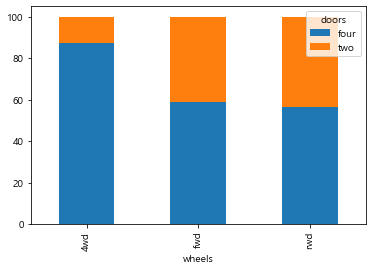

In [21]:
door_graph = door.plot.bar(stacked = True)

### Axis = 1과 Axis = 0의 차이
* Drop / Mean / Rank에서의 차이를 알아보자

In [33]:
sample = door.reset_index()
sample

doors,wheels,four,two
0,4wd,87.500000,12.500000
1,fwd,59.047619,40.952381
2,rwd,56.521739,43.478261


#### Drop
* axis = 0일 때: 지울 row를 지정해주면 행을 지운다
* axis = 1일 때: 지울 column을 지정해주면 열을 지운다

In [34]:
sample.drop([0,1])

doors,wheels,four,two
2,rwd,56.521739,43.478261


In [36]:
sample.drop(['two'], axis =1) 

doors,wheels,four
0,4wd,87.500000
1,fwd,59.047619
2,rwd,56.521739


#### mean
* axis = 0일 때: 세로축으로 평균 구하기 / 각 컬럼명에 대한 평균 / 결과가 가로로 나열되니까 axis = 0
* axis = 1일 때: 가로축으로 평균 구하기 / 각 로우명에 대한 형균 / 결과가 세로로 나열되니까 axis = 1

In [38]:
sample[['four','two']].mean()

doors
four    67.689786
two     32.310214
dtype: float64

In [41]:
sample[['four','two']].mean(axis = 1)

0    50.0
1    50.0
2    50.0
dtype: float64

#### rank
* 순위 매기기의 디폴트값이 작은게 1번으로, 따라서 큰 순서대로 하려면 ascending = False
* axis = 0일 때: 컬럼 내에서 각 행들을 비교해서 순위 매겨줌
* axis = 1일 때: 컬럼 두 개 이상에서 각 행들을 비교해서 순위 매겨줌

In [42]:
sample['four'].rank(ascending =False)

0    1.0
1    2.0
2    3.0
Name: four, dtype: float64

In [46]:
sample[['four', 'two']].rank(axis =1, ascending = False)

doors,four,two
0,1.0,2.0
1,1.0,2.0
2,1.0,2.0
